# 1.Business Understanding
A Terry stop is a police procedure that permits law enforcement officers to briefly detain an individual based on reasonable suspicion of criminal activity. Terry Stops are controversial because they give police a wider scope of authority or freedom to make decisions which may lead to wrongful arrests. If most stops don’t lead to arrests, it raises questions about whether they are fair or effective, a concern to policy makers and civil rights organizations.
## Stakeholder
The primary stakeholder is the Seattle Police Department (SPD) leadership and the City Council, who oversee policing practices. They aim to ensure stops are efficient, fair, and resource-effective amid public scrutiny on racial bias and over-policing.

# Business Problem
  Terry Stops consume significant officer time and resources. Predicting whether a stop will lead to an arrest (`Arrest Flag: Y/N`) can help SPD prioritize high-risk stops, allocate resources efficiently, and identify patterns for officer training to reduce low-yield stops. This is a binary classification problem where the target variable is `Arrest Flag` (Y = positive class, N = negative class)

#  Objectives
##  Main Objectives
To develop a machine learning model that predicts whether a Terry Stop conducted by the Seattle Police Department will result in an arrest, optimizing for precision to minimize unnecessary stops while maintaining acceptable recall to identify high-risk stops, thereby supporting efficient resource allocation and equitable policing practices.
    

## Specific Objectives
1. To preprocess and explore the Terry Stops dataset to identify key features influencing arrest outcomes, such as call type, precinct, and subject demographics.
2. To build and compare multiple classification models (logistic regression and decision trees) to determine the most effective model for predicting arrests.
3. To tune the selected model to achieve a balance between precision and recall, prioritizing the reduction of false positives to enhance public trust.
4. To interpret model results to provide actionable insights for SPD leadership, such as prioritizing high-risk stops and addressing potential biases in policing practices.\n",
    

## Research Questions
1. Which features (e.g., `Initial Call Type`, `Precinct`, `Subject Perceived Race`) are the strongest predictors of whether a Terry Stop results in an arrest?
2. How effectively can a machine learning model predict arrests while minimizing false positives (i.e., achieving high precision)?
3. How do logistic regression and decision tree models compare in terms of precision, recall, and interpretability for this classification task?
4. What actionable recommendations can be derived from the model’s predictions to improve SPD’s resource allocation and training on equitable policing?"

### Success Metrics
- **Precision**: Proportion of predicted arrests that are correct (minimize false positives to avoid wrongful arrests and public scrutiny).
- **Recall**: Proportion of actual arrests correctly predicted (ensure high-risk stops are not missed).
- **Baseline**: A dummy classifier predicting the majority class (no arrest) achieves ~85% accuracy due to class imbalance (15% arrests). We aim to improve precision and recall over this baseline.

# 2. Data Understanding

The dataset to be used in this project is from [Seattle Government](https://data.seattle.gov/Public-Safety/Terry-Stops/28ny-9ts8/about_data). Each row is a unique record of a Terry stop, as reported by the officer conducting the stop.

Rows
64.8K
Columns
23
Each row is a
A unique record of a Terry Stop, as reported by the officer conducting the stop.

### Columns
1. **Subject Age Group** - Subject Age Group (10 year increments) as reported by the officer.

2. **Subject ID** - Key(Unique Identifier)

3. **GO / SC Num** - General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data.

4. **Terry Stop ID** - Key identifying unique Terry Stop reports.

5. **Stop Resolution** - Resolution of the stop as reported by the officer.

6. **Weapon Type** - Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.

7. **Officer ID** - Key identifying unique officers in the dataset.

8. **Officer YOB** - Year of birth, as reported by the officer.

9. **Officer Gender** - Gender of the officer, as reported by the officer.

10. **Officer Race** - Race of the officer, as reported by the officer.

11. **Subject Perceived Race** - Perceived race of the subject, as reported by the officer.

12. **Subject Perceived Gender** - Perceived gender of the subject, as reported by the officer.

13. **Reported Date** - Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.

14. **Reported Time** - Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.

15. **Initial Call Type** - Initial classification of the call as assigned by 911.

16. **Final Call Type** - Final classification of the call as assigned by the primary officer closing the event.

17. **Call Type** - How the call was received by the communication center.

18. **Officer Squad** - Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).

19. **Arrest Flag** - Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS).

20. **Frisk Flag** - Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.

21. **Precinct** - Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

22. **Sector** - Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

23. **Beat** - Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

In [1]:
# Importing the necessecary libraries
import pandas as pd # Data manipulation
import numpy as np # Mathematics
import matplotlib.pyplot as plt # Visualization
# This makes our graphs show up in the notebook
%matplotlib inline

import seaborn as sns # Advanved visualization
# Let's set a style for our graphs to make them look nicer
sns.set_style("whitegrid")

In [2]:
# Setting the maximum display of columns to 30 
# This is to get a look at all the columns
pd.options.display.max_columns = 30

In [3]:
# We read the CSV file into a Pandas DataFrame, which is like a super-powered Excel sheet inside Python.

df = pd.read_csv(r"C:\Users\Jeremy\Downloads\Terry_Stops_20250908.csv")

# Let's see what we're working with!
print("Dataset Shape:", df.shape) # Tells us (number of rows, number of columns)
df.head() # Shows the first 5 rows

Dataset Shape: (64699, 23)


,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,46 - 55,-1,20180000275629,481899,Field Contact,NaN,8544,1993,Female,Hispanic,White,Male,2018-07-30T00:00:00,13:47:00.0000000,-,-,-,NORTH PCT 2ND WATCH - B/N RELIEF,N,N,West,Q,Q2
1,36 - 45,53986235598,20240000029589,53986202139,Field Contact,-,8723,1994,Male,White,Black or African American,Male,2024-02-01T00:00:00,02:50:52.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,DISTURBANCE - OTHER,ONVIEW,WEST PCT 3RD W - KING - PLATOON 1,N,N,West,D,D2
2,26 - 35,-1,20170000036835,234548,Offense Report,NaN,4852,1953,Male,Asian,White,Male,2017-01-30T00:00:00,18:36:00.0000000,DISTURBANCE,THEFT - SHOPLIFT,911,NORTH PCT 2ND W - LINCOLN - PLATOON 1,N,N,North,L,L3
3,18 - 25,-1,20180000271087,445585,Offense Report,NaN,8588,1986,Female,White,Black or African American,Male,2018-07-23T00:00:00,05:43:00.0000000,"OBS WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/D...","WEAPON, PERSON WITH - GUN",911,TRAINING - FIELD TRAINING SQUAD,N,Y,North,J,J1
4,18 - 25,-1,20150000002928,54115,Field Contact,NaN,7745,1988,Female,Declined to Answer,Black or African American,Female,2015-06-17T00:00:00,00:22:00.0000000,-,-,-,SOUTH PCT 3RD W - SAM - PLATOON 2,N,N,-,-,-


In [4]:
# Getting the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64699 entries, 0 to 64698
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         64699 non-null  object
 1   Subject ID                64699 non-null  int64 
 2   GO / SC Num               64699 non-null  int64 
 3   Terry Stop ID             64699 non-null  int64 
 4   Stop Resolution           64699 non-null  object
 5   Weapon Type               32134 non-null  object
 6   Officer ID                64699 non-null  object
 7   Officer YOB               64699 non-null  int64 
 8   Officer Gender            64699 non-null  object
 9   Officer Race              64699 non-null  object
 10  Subject Perceived Race    64699 non-null  object
 11  Subject Perceived Gender  64699 non-null  object
 12  Reported Date             64699 non-null  object
 13  Reported Time             64699 non-null  object
 14  Initial Call Type     

In [5]:
# Check for null values
df.isna().sum()

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 566
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64

**Observations**<br>
- There are a total of 23 columns and 64699 rows in this dataset
- From this information, we can use `Arrest Flag` as the target variable
- There are several null values from my data
- There's a mixture of both categorical data and numeric data
- Some of the predictor variables include `weapon_type`, `Frisk Flag`, `reported_time` among others.

## 3. Data Preparation
This is where data cleaning, preprocessing, analysis is done.

### 3.1 Data cleaning
Data from the real world is often messy. We need to clean it up before we can use it.

This is where the following is done:
- Dealing with missing values
- Checking for duplicates
- Dealing with outliers among others.

In [6]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

No duplicates.

In [7]:
# Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum()) # This counts true 'NaN' values


Missing Values in Each Column:
Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 566
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64


In [8]:
# Creating a function to replace '-' with 'Unknown'
def replace_func(data):
    data = data.replace(to_replace= '-', value= 'Unknown', inplace= True)
    return data


In [9]:
# Reolacing NaN with Unknown from weapon type column
df['Weapon Type'] = df['Weapon Type'].replace(to_replace= np.nan, value= 'Unknown')

# Replacing '-' with 'Unknown'
replace_func(df['Weapon Type'])

The dash(-) in this case has been used as a placeholder, so we'll have to add it to the Unknown value. Also the null values will be added to the Unknown value. We can't use mode in this case to fill in the missing values as the values in this column are very sensitive so its best if we just add them to the None category.

In [10]:
# mapping dictionary for merging categories

weapon_map = {
    # Knives
    "Knife/Cutting/Stabbing Instrument": "Knife/Cutting",
    "Lethal Cutting Instrument": "Knife/Cutting",
  
    # Firearms (general/other)
    "Firearm": "Firearm",
    "Firearm Other": "Firearm",
    "Other Firearm": "Firearm",
    "Firearm (unk type)": "Firearm",
    "Rifle": "Firearm",
    "Shotgun": "Firearm",
    "Handgun": "Firearm",
    "Automatic Handgun": "Firearm",
    
    # Blunt objects
    "Blunt Object/Striking Implement": "Blunt Object",
    "Club": "Blunt Object",
    "Blackjack": "Blunt Object",
    "Brass Knuckles": "Blunt Object",
    "Club, Blackjack, Brass Knuckles": "Blunt Object",
    
    # Chemicals
    "Mace/Pepper Spray": "Chemical",
    "Poison": "Chemical",
    
    # Other weapons
    "Taser/Stun Gun": "Other",
    "Fire/Incendiary Device": "Other",
    "Personal Weapons (hands, feet, etc.)": "Other",

    # None 
    "None/Not Applicable": "None"

}

# apply mapping
df['Weapon Type'] = df['Weapon Type'].replace(weapon_map)

# check results
df['Weapon Type'].value_counts()

Weapon Type
Unknown          60566
Knife/Cutting     2973
Firearm            780
Blunt Object       259
Chemical            65
Other               35
None                21
Name: count, dtype: int64

In [11]:
# Dropping the remaining null values as they are little and may not impact the dataset
df.dropna(inplace = True)
df.isna().sum() # Checking if the changes have been made

Subject Age Group           0
Subject ID                  0
GO / SC Num                 0
Terry Stop ID               0
Stop Resolution             0
Weapon Type                 0
Officer ID                  0
Officer YOB                 0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Reported Date               0
Reported Time               0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Officer Squad               0
Arrest Flag                 0
Frisk Flag                  0
Precinct                    0
Sector                      0
Beat                        0
dtype: int64

In [12]:
# Matches the indexing with the current number of rows after dropping the null rows
df = df.reset_index(drop = True)

In [13]:
# Checking if the indexing has worked by looking at the total entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64133 entries, 0 to 64132
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         64133 non-null  object
 1   Subject ID                64133 non-null  int64 
 2   GO / SC Num               64133 non-null  int64 
 3   Terry Stop ID             64133 non-null  int64 
 4   Stop Resolution           64133 non-null  object
 5   Weapon Type               64133 non-null  object
 6   Officer ID                64133 non-null  object
 7   Officer YOB               64133 non-null  int64 
 8   Officer Gender            64133 non-null  object
 9   Officer Race              64133 non-null  object
 10  Subject Perceived Race    64133 non-null  object
 11  Subject Perceived Gender  64133 non-null  object
 12  Reported Date             64133 non-null  object
 13  Reported Time             64133 non-null  object
 14  Initial Call Type     

In [14]:
# Standardizing formats
df['Reported Date'] = pd.to_datetime(df['Reported Date'])
df['Reported Date']

0       2018-07-30
1       2024-02-01
2       2017-01-30
3       2018-07-23
4       2015-06-17
           ...    
64128   2015-09-29
64129   2021-12-19
64130   2016-05-23
64131   2023-03-03
64132   2022-07-05
Name: Reported Date, Length: 64133, dtype: datetime64[ns]

In [15]:
df['Reported Time'] = pd.to_datetime(df['Reported Time'])

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_23716\2153869983.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Reported Time'] = pd.to_datetime(df['Reported Time'])


In [16]:
# Change the dash placeholder with Unknown
replace_func(df['Call Type'])

In [17]:
# Get stop year so that I can compute the officer's age
df["stop_year"] = df["Reported Date"].dt.year

# Compute officer age at time of stop
df["Officer Age"] = df["stop_year"] - df["Officer YOB"]

In [18]:
df["Officer Age"] = df["Officer Age"].astype(int)

In [19]:
type(df["Officer Age"])

pandas.core.series.Series

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64133 entries, 0 to 64132
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Subject Age Group         64133 non-null  object        
 1   Subject ID                64133 non-null  int64         
 2   GO / SC Num               64133 non-null  int64         
 3   Terry Stop ID             64133 non-null  int64         
 4   Stop Resolution           64133 non-null  object        
 5   Weapon Type               64133 non-null  object        
 6   Officer ID                64133 non-null  object        
 7   Officer YOB               64133 non-null  int64         
 8   Officer Gender            64133 non-null  object        
 9   Officer Race              64133 non-null  object        
 10  Subject Perceived Race    64133 non-null  object        
 11  Subject Perceived Gender  64133 non-null  object        
 12  Reported Date     

<Axes: ylabel='Officer Age'>

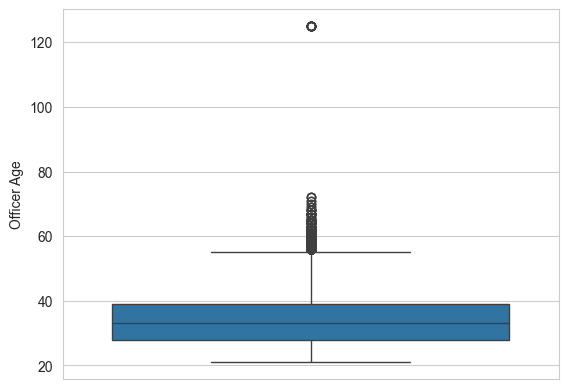

In [ ]:
# Creating a boxplot to look for outliers
sns.boxplot(data= df["Officer Age"])

In [22]:
# Removing outliers
Q1 = df["Officer Age"].quantile(0.25)
Q3 = df["Officer Age"].quantile(0.75)

# Calculating the IQR( IQR= Q3- Q1)
IQR = Q3 - Q1

# Detecting the outliers
lower_fence = Q1 - (1.5*IQR)
upper_fence = Q3 + (1.5*IQR)

# Removing the Outliers
df["Officer Age"] = (df["Officer Age"] >= lower_fence) & (df["Officer Age"] <= upper_fence)

In [23]:
# Check for the values in the subject age category
df['Subject Age Group'].value_counts(normalize= True)

Subject Age Group
26 - 35         0.333588
36 - 45         0.227309
18 - 25         0.186254
46 - 55         0.126565
56 and Above    0.052890
1 - 17          0.036861
-               0.036533
Name: proportion, dtype: float64

In [24]:
# Since the dash placeholder contains 3% of the data in that column and I have no option of an unknown category,
# We've opted to drop the rows with the dash placeholder in that specific column
df = df[df['Subject Age Group'] != '-']
df = df.reset_index(drop = True) # Make the indexing correct after manipulating the data

In [25]:
# Check for the values in the Frisk Flag category
df['Frisk Flag'].value_counts(normalize= True)

Frisk Flag
N    0.750607
Y    0.243098
-    0.006296
Name: proportion, dtype: float64

In [26]:
# Since the dash placeholder contains 0.6% of the data in that column and I have no option of an unknown category,
# I've opted to drop the rows with the dash placeholder in that specific column
df = df[df['Frisk Flag'] != '-']
df = df.reset_index(drop = True)

In [27]:
df['Arrest Flag']= df['Arrest Flag'].map({'N': 0, 'Y': 1}) # To reduce bias in the model (1 for Arrest, 0 for No Arrest)

In [28]:
# For simplicity, we might drop columns with too many missing values or that are hard to use.
# We'll also drop columns that are just IDs or exact times for now.
columns_to_drop = ['Subject ID', 'GO / SC Num', 'Terry Stop ID', 'Officer ID', 'Reported Time', 'Officer YOB', 'Beat', 'Sector']
df_clean = df.drop(columns=columns_to_drop, errors='ignore')

# Let's also just use a few key features for our first model to keep it simple.
# We can add more later to see if it improves performance!
selected_features = ['Subject Perceived Race', 'Subject Perceived Gender', 'Weapon Type', 'Frisk Flag', 'Precinct', 'Call Type']
df_model = df_clean[selected_features + ['Arrest Flag']].copy()

# Drop any rows where our selected features are still missing
df_model.dropna(inplace=True)
print("New shape of our modeling dataset:", df_model.shape)

New shape of our modeling dataset: (61401, 7)


## 4. Exploratory Data Analysis (EDA)

Now let's make some graphs to understand our data better.

# 1. Arrests by Subject's Perceived Race
The goal is to se if there is disparity in arrest rates across different racial groups

In [ ]:
# Getting a table of subject's race and arrest flag
df.groupby(['Subject Perceived Race', 'Arrest Flag']).size().unstack(fill_value= 0)

Arrest Flag,0,1
Subject Perceived Race,,
-,1318.0,97.0
American Indian or Alaska Native,1490.0,195.0
Asian,1842.0,303.0
Black or African American,15995.0,2534.0
Hispanic,1634.0,NaN
Multi-Racial,781.0,NaN
Native Hawaiian or Other Pacific Islander,130.0,47.0
Other,146.0,NaN
Unknown,3822.0,619.0


<Figure size 1200x600 with 0 Axes>

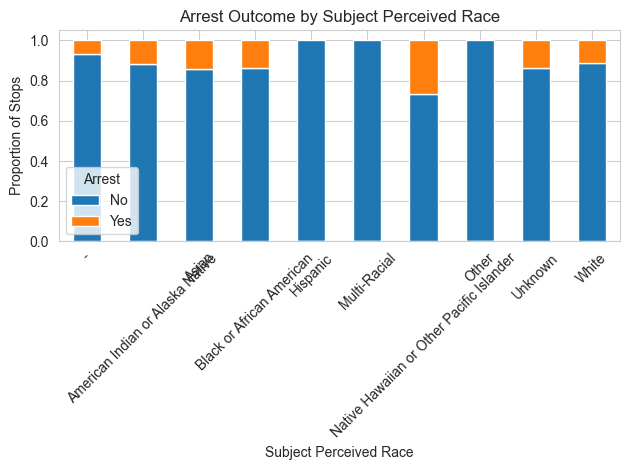

In [30]:
plt.figure(figsize=(12, 6))
# Use a crosstab to count arrests vs race
arrest_by_race = pd.crosstab(df_model['Subject Perceived Race'], df_model['Arrest Flag'], normalize='index')
arrest_by_race.plot(kind='bar', stacked=True)
plt.title('Arrest Outcome by Subject Perceived Race')
plt.xlabel('Subject Perceived Race')
plt.ylabel('Proportion of Stops')
plt.legend(title='Arrest', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Arrests by Weapon Type
The goal is to see if weapon presence is a strong predictor of arrest.

<Figure size 1000x500 with 0 Axes>

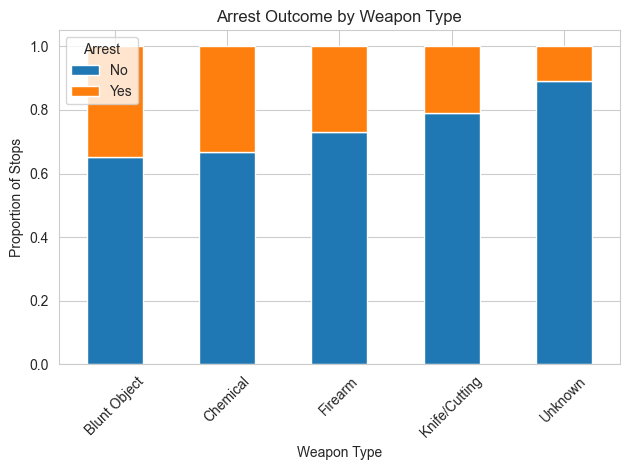

In [31]:
top_weapons = df_model['Weapon Type'].value_counts().nlargest(5).index
df_top_weapons = df_model[df_model['Weapon Type'].isin(top_weapons)]

plt.figure(figsize=(10, 5))
arrest_by_weapon = pd.crosstab(df_top_weapons['Weapon Type'], df_top_weapons['Arrest Flag'], normalize='index')
arrest_by_weapon.plot(kind='bar', stacked=True)
plt.title('Arrest Outcome by Weapon Type')
plt.xlabel('Weapon Type')
plt.ylabel('Proportion of Stops')
plt.legend(title='Arrest', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Frisk Flag', ylabel='count'>

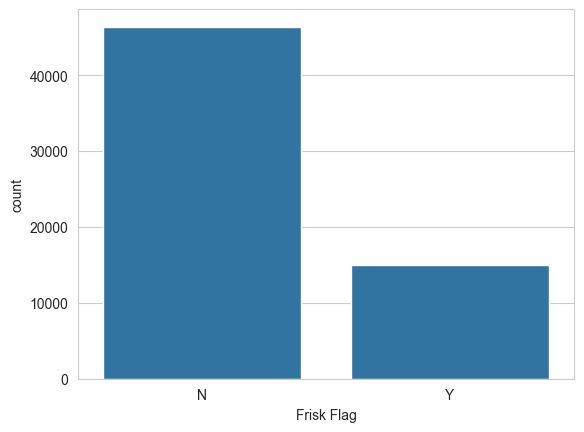

In [32]:
# countplot for the Frisk Flag variable
sns.countplot(x='Frisk Flag', data=df)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '46 - 55'),
  Text(1, 0, '36 - 45'),
  Text(2, 0, '26 - 35'),
  Text(3, 0, '18 - 25'),
  Text(4, 0, '56 and Above'),
  Text(5, 0, '1 - 17')])

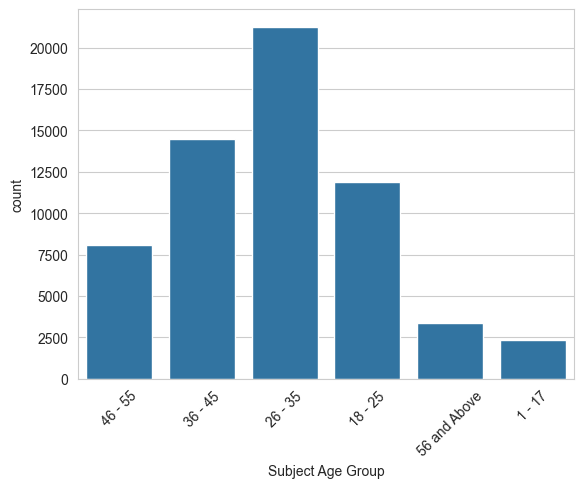

In [33]:
sns.countplot(x='Subject Age Group', data=df)
plt.xticks(rotation=45)

<Axes: xlabel='Subject Perceived Race'>

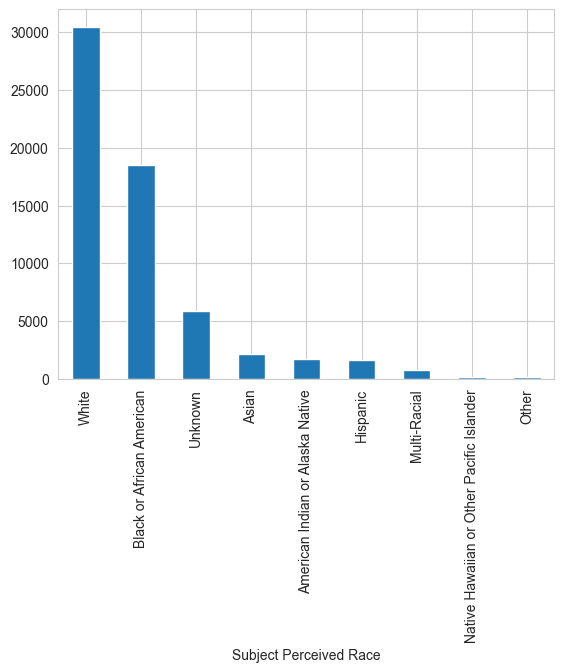

In [34]:
replace_func(df['Subject Perceived Race'])
# Getting a visual of the subject race
df['Subject Perceived Race'].value_counts().plot(kind='bar')

<Axes: xlabel='Officer Race'>

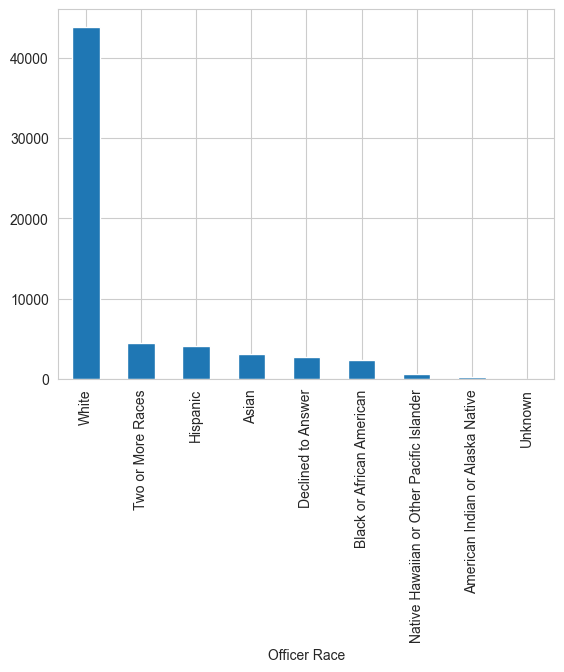

In [35]:
df['Officer Race'].value_counts().plot(kind='bar')


In [36]:
df.groupby(['Subject Age Group', 'Arrest Flag']).size().unstack()

Arrest Flag,0,1
Subject Age Group,,
1 - 17,2186,160
18 - 25,10670,1188
26 - 35,18638,2626
36 - 45,12548,1954
46 - 55,7132,926
56 and Above,2968,405


<Axes: xlabel='Subject Age Group'>

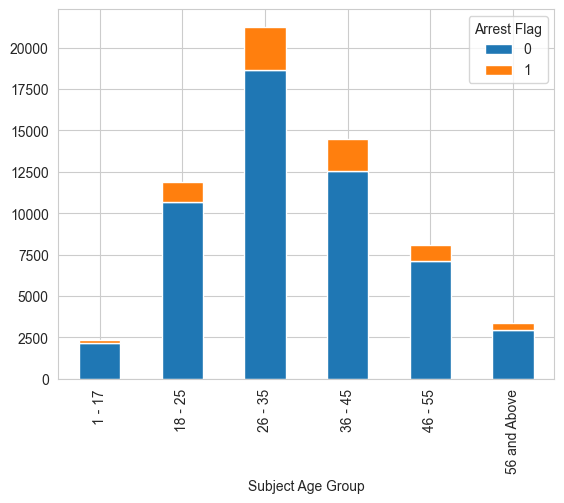

In [37]:
df.groupby(['Subject Age Group', 'Arrest Flag']).size().unstack().plot(kind='bar', stacked=True)

In [38]:
# Getting a table to show subject's gender and the stop resolution
df.groupby('Subject Perceived Gender')['Stop Resolution'].value_counts().unstack(fill_value= 0)

Stop Resolution,Arrest,Citation / Infraction,Field Contact,Offense Report,Referred for Prosecution
Subject Perceived Gender,,,,,
-,4,0,6,4,0
Female,2746,41,5954,3416,175
Gender Diverse (gender non-conforming and/or transgender),15,0,41,3,0
Male,12336,175,24120,11671,524
Unable to Determine,14,1,53,37,0
Unknown,6,0,49,10,0


<Axes: title={'center': 'Subject Gender and the Stop Resolution'}, xlabel='Gender', ylabel='Stop Resolution'>

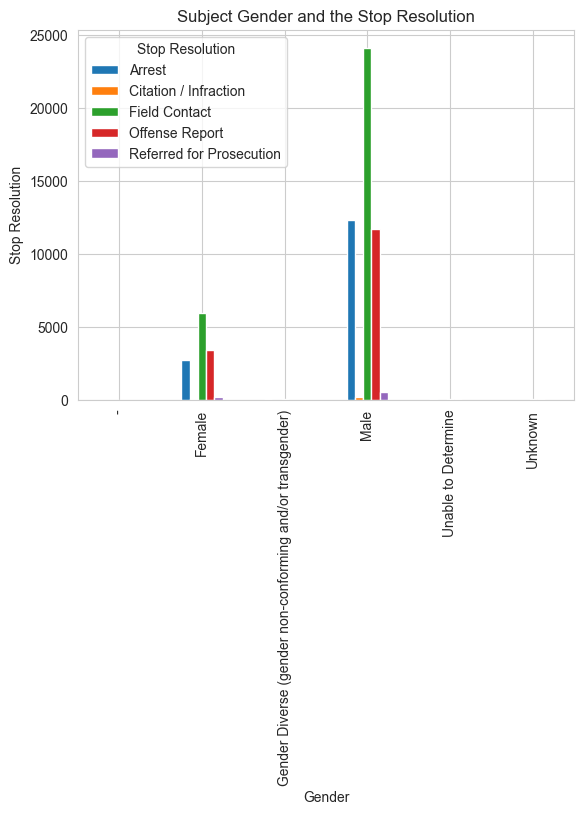

In [39]:
# Creating a bar grapg to show subject's gender and the stop resolution
df.groupby('Subject Perceived Gender')['Stop Resolution'].value_counts().unstack(fill_value= 0).plot(kind= 'bar',
                                                                                                              title= 'Subject Gender and the Stop Resolution',
                                                                                                              xlabel= 'Gender',
                                                                                                              ylabel= 'Stop Resolution')

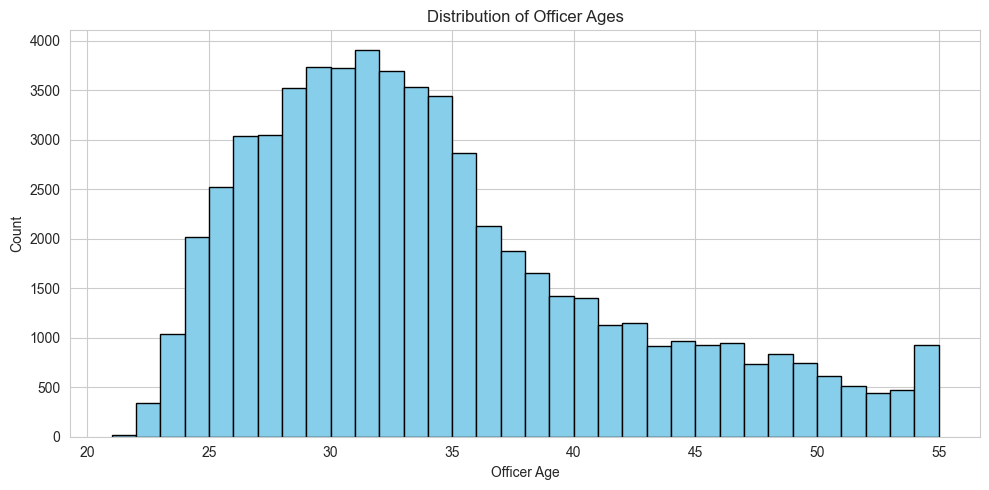

In [40]:
# Recalculate numeric Officer Age for plotting
officer_age_numeric = df["stop_year"] - df["Officer YOB"]
plt.figure(figsize=(10, 5))
plt.hist(officer_age_numeric, bins=range(officer_age_numeric.min(), int(upper_fence) + 1, 1), color='skyblue', edgecolor='black')
plt.title("Distribution of Officer Ages")
plt.xlabel("Officer Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [41]:
# Chossing the relevant columns to use in achieving my objective
relevant_columns = [
    'Subject Age Group', 'Stop Resolution', 'Weapon Type', 'Officer Age', 'Officer Gender', 'Officer Race', 'Subject Perceived Race', 'Subject Perceived Gender',
    'Call Type', 'Arrest Flag', 'Frisk Flag', 'Precinct'
]

In [42]:
# Check for placeholders in the values of each column
for col in relevant_columns:
    print(f'{col}: {df[col].unique()}')

Subject Age Group: ['46 - 55' '36 - 45' '26 - 35' '18 - 25' '56 and Above' '1 - 17']
Stop Resolution: ['Field Contact' 'Offense Report' 'Arrest' 'Citation / Infraction'
 'Referred for Prosecution']
Weapon Type: ['Unknown' 'Knife/Cutting' 'Blunt Object' 'Firearm' 'Chemical' 'None'
 'Other']
Officer Age: [ True False]
Officer Gender: ['Female' 'Male']
Officer Race: ['Hispanic' 'White' 'Asian' 'Declined to Answer'
 'Black or African American' 'Two or More Races'
 'Native Hawaiian or Other Pacific Islander'
 'American Indian or Alaska Native' 'Unknown']
Subject Perceived Race: ['White' 'Black or African American'
 'Native Hawaiian or Other Pacific Islander'
 'American Indian or Alaska Native' 'Unknown' 'Hispanic' 'Multi-Racial'
 'Other' 'Asian']
Subject Perceived Gender: ['Male' 'Female' 'Unable to Determine'
 'Gender Diverse (gender non-conforming and/or transgender)' 'Unknown' '-']
Call Type: ['Unknown' 'ONVIEW' '911' 'TELEPHONE OTHER, NOT 911'
 'ALARM CALL (NOT POLICE ALARM)' 'SCHEDULED

In [43]:
# Compiling the relevant columns
df_2 = df.loc[:,relevant_columns]
df_2.head() # View top 5 entries

,Subject Age Group,Stop Resolution,Weapon Type,Officer Age,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Call Type,Arrest Flag,Frisk Flag,Precinct
0,46 - 55,Field Contact,Unknown,True,Female,Hispanic,White,Male,Unknown,0,N,West
1,36 - 45,Field Contact,Unknown,True,Male,White,Black or African American,Male,ONVIEW,0,N,West
2,26 - 35,Offense Report,Unknown,False,Male,Asian,White,Male,911,0,N,North
3,18 - 25,Offense Report,Unknown,True,Female,White,Black or African American,Male,911,0,Y,North
4,18 - 25,Field Contact,Unknown,True,Female,Declined to Answer,Black or African American,Female,Unknown,0,N,-


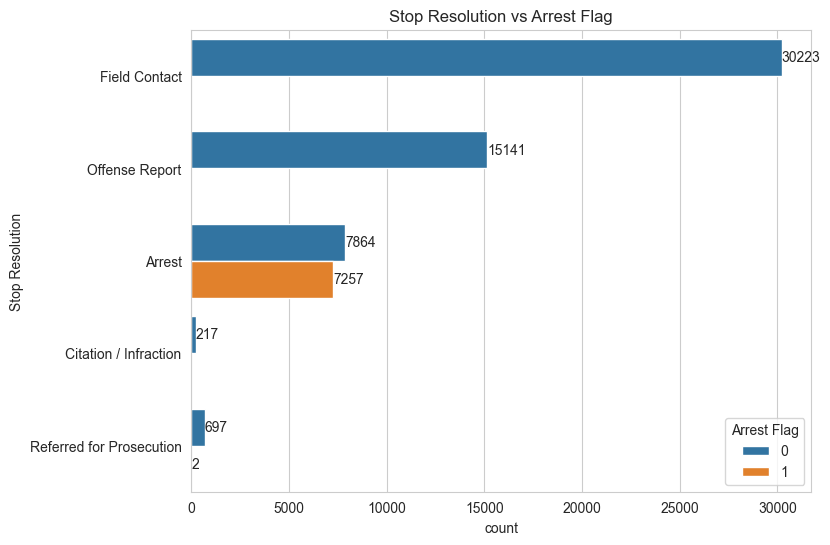

In [44]:
figure, ax = plt.subplots(figsize = (8, 6))
# Plot the countplot
sns.countplot(data = df_2, y = 'Stop Resolution', hue = df['Arrest Flag'].astype(str)) # The Arrest flag is made a string temporarily so that I can plot
ax.set_title('Stop Resolution vs Arrest Flag') # Set title
# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge');

In [45]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [46]:
# Define the variables
X = df_2.drop('Arrest Flag', axis = 1) # Independent/features
y = df_2['Arrest Flag'] # Dependent/target

In [47]:
# Split the data into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
# Change the categories using one-hot encoder
ohe = OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown = 'ignore')

X_train_categorical = X_train.select_dtypes('object').copy() # Defining the categorical variables in train set
X_train_categorical
X_test_categorical = X_test.select_dtypes('object').copy() # Defining the categorical variables in the test set
X_test_categorical

,Subject Age Group,Stop Resolution,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Call Type,Frisk Flag,Precinct
28641,26 - 35,Field Contact,Unknown,Male,Hispanic,Black or African American,Male,Unknown,N,-
34913,36 - 45,Arrest,Knife/Cutting,Male,Hispanic,White,Male,911,Y,North
9785,46 - 55,Field Contact,Unknown,Male,White,Black or African American,Male,911,Y,North
53339,36 - 45,Arrest,Unknown,Male,White,Black or African American,Male,"TELEPHONE OTHER, NOT 911",Y,East
57504,18 - 25,Offense Report,Unknown,Male,White,White,Male,911,N,North
...,...,...,...,...,...,...,...,...,...,...
47784,36 - 45,Offense Report,Unknown,Male,White,American Indian or Alaska Native,Male,911,Y,West
54214,18 - 25,Arrest,Unknown,Male,White,Black or African American,Male,911,N,West
50781,46 - 55,Field Contact,Unknown,Male,White,White,Male,911,N,East
39331,36 - 45,Field Contact,Unknown,Male,White,Unknown,Male,ONVIEW,N,West


In [49]:
ohe.fit(X_train_categorical) # Fit the data to the onehotencoder
X_train_ohe = pd.DataFrame( # Change it to a dataframe
    ohe.transform(X_train_categorical),
    index = X_train_categorical.index,
    columns=ohe.get_feature_names_out(X_train_categorical.columns) # Get column names
)
X_train_ohe

,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,Stop Resolution_Citation / Infraction,Stop Resolution_Field Contact,Stop Resolution_Offense Report,Stop Resolution_Referred for Prosecution,Weapon Type_Chemical,Weapon Type_Firearm,Weapon Type_Knife/Cutting,Weapon Type_None,Weapon Type_Other,Weapon Type_Unknown,...,Call Type_ALARM CALL (NOT POLICE ALARM),Call Type_HISTORY CALL (RETRO),Call Type_ONVIEW,"Call Type_TELEPHONE OTHER, NOT 911",Call Type_TEXT MESSAGE,Call Type_Unknown,Frisk Flag_Y,Precinct_East,Precinct_FK ERROR,Precinct_North,Precinct_OOJ,Precinct_South,Precinct_Southwest,Precinct_Unknown,Precinct_West
29827,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59938,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29555,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51597,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30547,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
860,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15795,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
# Transform the test data using the encoder
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical),  
    index=X_test_categorical.index,
    columns=ohe.get_feature_names_out(X_test_categorical.columns) 
)
X_test_ohe

c:\Users\Jeremy\anaconda3\envs\env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,Stop Resolution_Citation / Infraction,Stop Resolution_Field Contact,Stop Resolution_Offense Report,Stop Resolution_Referred for Prosecution,Weapon Type_Chemical,Weapon Type_Firearm,Weapon Type_Knife/Cutting,Weapon Type_None,Weapon Type_Other,Weapon Type_Unknown,...,Call Type_ALARM CALL (NOT POLICE ALARM),Call Type_HISTORY CALL (RETRO),Call Type_ONVIEW,"Call Type_TELEPHONE OTHER, NOT 911",Call Type_TEXT MESSAGE,Call Type_Unknown,Frisk Flag_Y,Precinct_East,Precinct_FK ERROR,Precinct_North,Precinct_OOJ,Precinct_South,Precinct_Southwest,Precinct_Unknown,Precinct_West
28641,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34913,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9785,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53339,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57504,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47784,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
54214,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50781,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39331,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
# Scale the officer's age using minmaxscaler
scaler = MinMaxScaler()
numeric_features = ['Officer Age']
X_train_numeric = X_train[numeric_features].copy() # Defining the numeric values in the training set
X_train_numeric
X_test_numeric = X_test[numeric_features].copy() # Defining the numeric values in the testing set
X_test_numeric

,Officer Age
28641,True
34913,True
9785,True
53339,True
57504,True
...,...
47784,True
54214,True
50781,True
39331,True


In [52]:
# Fit the scaler
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric),
                       index = X_train_numeric.index,
                       columns = X_train_numeric.columns)
X_train_scaled

,Officer Age
29827,1.0
59938,1.0
29555,1.0
51597,1.0
30547,1.0
...,...
54343,1.0
38158,1.0
860,1.0
15795,1.0


In [53]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test_numeric),
                       index = X_test_numeric.index,
                       columns = X_test_numeric.columns)
X_test_scaled

,Officer Age
28641,1.0
34913,1.0
9785,1.0
53339,1.0
57504,1.0
...,...
47784,1.0
54214,1.0
50781,1.0
39331,1.0


In [54]:
# Add back all the transformed numerical X features
X_train_full = pd.concat([X_train_ohe.reset_index(drop = True), X_train_scaled.reset_index(drop = True)], axis = 1)
X_train_full

,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,Stop Resolution_Citation / Infraction,Stop Resolution_Field Contact,Stop Resolution_Offense Report,Stop Resolution_Referred for Prosecution,Weapon Type_Chemical,Weapon Type_Firearm,Weapon Type_Knife/Cutting,Weapon Type_None,Weapon Type_Other,Weapon Type_Unknown,...,Call Type_HISTORY CALL (RETRO),Call Type_ONVIEW,"Call Type_TELEPHONE OTHER, NOT 911",Call Type_TEXT MESSAGE,Call Type_Unknown,Frisk Flag_Y,Precinct_East,Precinct_FK ERROR,Precinct_North,Precinct_OOJ,Precinct_South,Precinct_Southwest,Precinct_Unknown,Precinct_West,Officer Age
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49116,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
49117,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49118,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [55]:
# Add back all the transformed numerical X features
X_test_full = pd.concat([X_test_ohe.reset_index(drop = True), X_test_scaled.reset_index(drop = True)], axis = 1)
X_test_full

,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,Stop Resolution_Citation / Infraction,Stop Resolution_Field Contact,Stop Resolution_Offense Report,Stop Resolution_Referred for Prosecution,Weapon Type_Chemical,Weapon Type_Firearm,Weapon Type_Knife/Cutting,Weapon Type_None,Weapon Type_Other,Weapon Type_Unknown,...,Call Type_HISTORY CALL (RETRO),Call Type_ONVIEW,"Call Type_TELEPHONE OTHER, NOT 911",Call Type_TEXT MESSAGE,Call Type_Unknown,Frisk Flag_Y,Precinct_East,Precinct_FK ERROR,Precinct_North,Precinct_OOJ,Precinct_South,Precinct_Southwest,Precinct_Unknown,Precinct_West,Officer Age
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12276,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12277,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12278,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12279,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


## 4 & 5. Modelling &  Evaluation

In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42) # Using SMOTE to solve class imbalance
X1_train, y1_train = smote.fit_resample(X_train_full, y_train)

In [57]:
y1_train.value_counts() # To check if the classes have balanced data

Arrest Flag
0    43367
1    43367
Name: count, dtype: int64

In [58]:
# Fit the training data to the model
# Saga works well for large datasets, the minor class is used 3x
logreg = LogisticRegression(fit_intercept = False, solver = 'saga', C = 1.0, class_weight = {0:1, 1:3})
model = logreg.fit(X1_train, y1_train)
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,"{0: 1, 1: 3}"
,random_state,None
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


In [59]:
# Evaluating the model using precision, accuracy, recall and f1 score metrics
y_pred_lr = model.predict(X_test_full)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     10775
           1       0.52      1.00      0.68      1506

    accuracy                           0.88     12281
   macro avg       0.76      0.93      0.80     12281
weighted avg       0.94      0.88      0.90     12281



In [60]:
y_score = logreg.fit(X_train_full, y_train).decision_function(X_test_full)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [61]:
print('AUC: {}'.format(auc(fpr, tpr))) # AUC score of the model

AUC: 0.9581875129027586


AUC: 0.9581875129027586


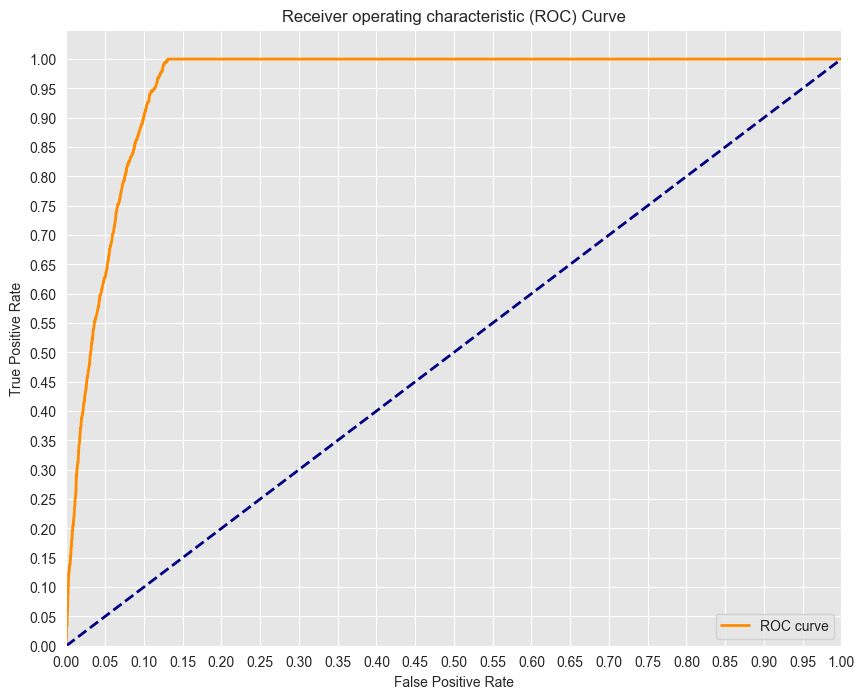

In [62]:
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [63]:
# Import the Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_no_tune= DecisionTreeClassifier()# the minor class is used 3x

tree_no_tune.fit(X1_train, y1_train)# Fit the training data to the model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [64]:
y_pred_dr = tree_no_tune.predict(X_test_full) # Form predictions using the test set

print(accuracy_score(y_test, y_pred_dr)) # Accuracy of the model
print(classification_report(y_test, y_pred_dr)) # A classification report that has all the results for the precision, recall, accuracy, f1-score

0.8947968406481557
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     10775
           1       0.55      0.77      0.64      1506

    accuracy                           0.89     12281
   macro avg       0.76      0.84      0.79     12281
weighted avg       0.91      0.89      0.90     12281



In [65]:
# Import the Decision Tree tuning using entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree = DecisionTreeClassifier(criterion='entropy', class_weight = {0:1, 1:3})# the minor class is used 3x

tree.fit(X1_train, y1_train)# Fit the training data to the model

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,"{0: 1, 1: 3}"


In [66]:
y_pred_dr = tree.predict(X_test_full) # Form predictions using the test set

In [67]:
print(accuracy_score(y_test, y_pred_dr)) # Accuracy of the model
print(classification_report(y_test, y_pred_dr)) # A classification report that has all the results for the precision, recall, accuracy, f1-score

0.8940640013028255
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     10775
           1       0.54      0.84      0.66      1506

    accuracy                           0.89     12281
   macro avg       0.76      0.87      0.80     12281
weighted avg       0.92      0.89      0.90     12281



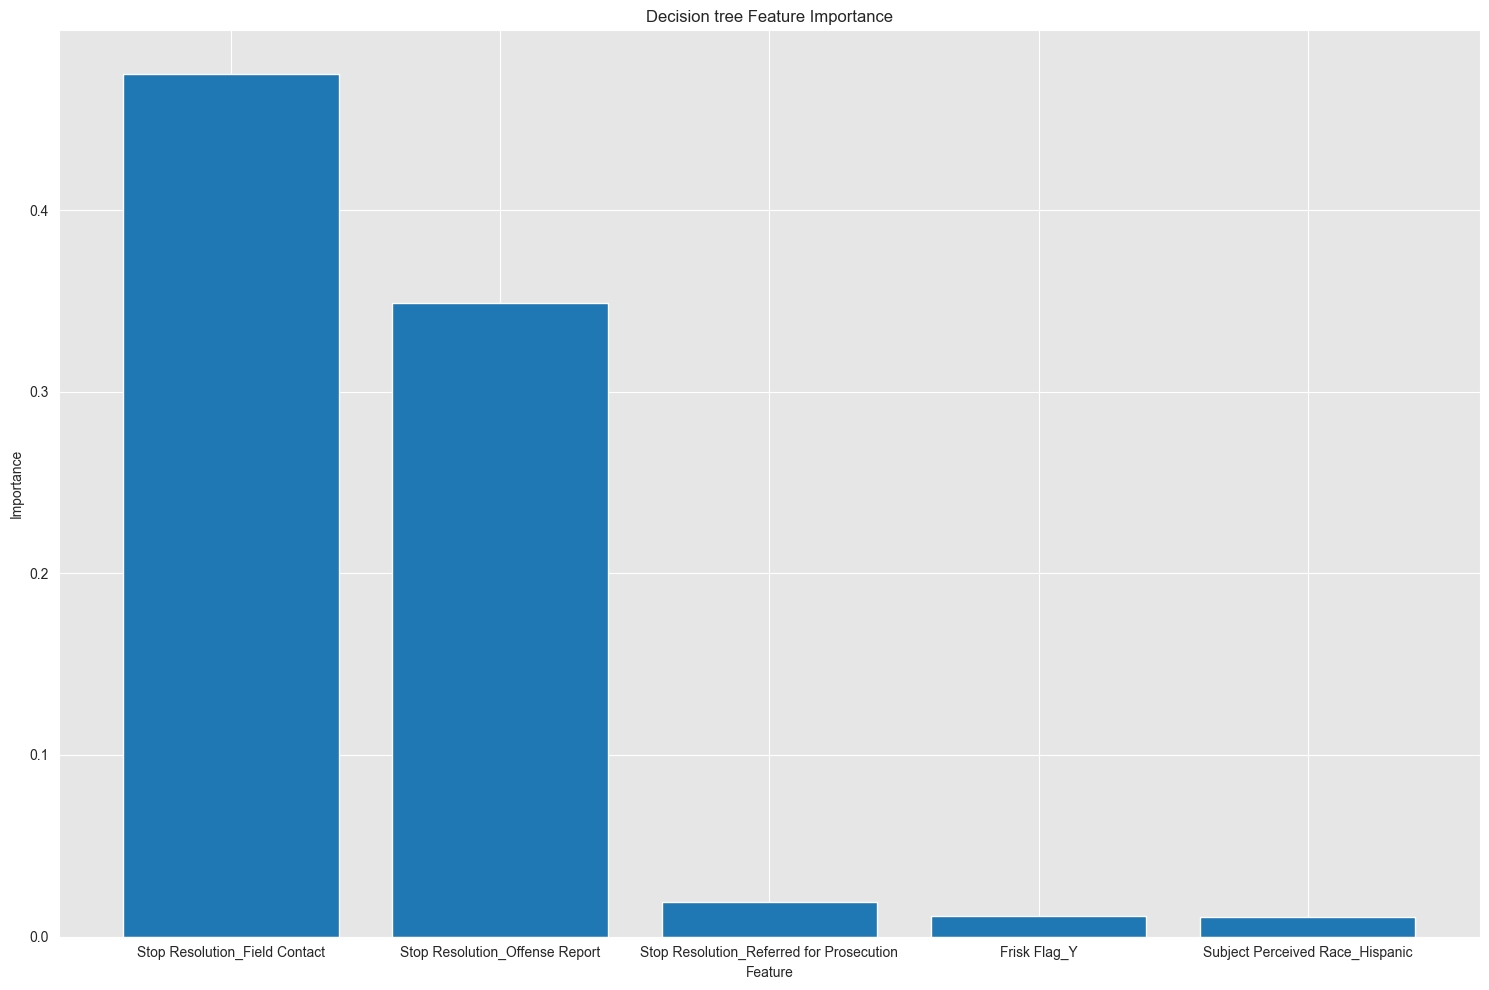

In [68]:
# Feature Importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X_train_full.columns,
    'importance': tree.feature_importances_
}).sort_values('importance', ascending=False).nlargest(5,'importance' )

plt.figure(figsize=(15, 10))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Decision tree Feature Importance')
plt.tight_layout()
plt.show()

In [69]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(random_state = 42, class_weight = 'balanced', n_estimators = 200)
rand.fit(X1_train, y1_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [70]:
y_pred_rf = rand.predict(X_test_full) # Form the predictions using test set

In [71]:
print(classification_report(y_test, y_pred_rf)) # See the classification report which shows the results of the model

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     10775
           1       0.56      0.82      0.66      1506

    accuracy                           0.90     12281
   macro avg       0.77      0.86      0.80     12281
weighted avg       0.92      0.90      0.91     12281



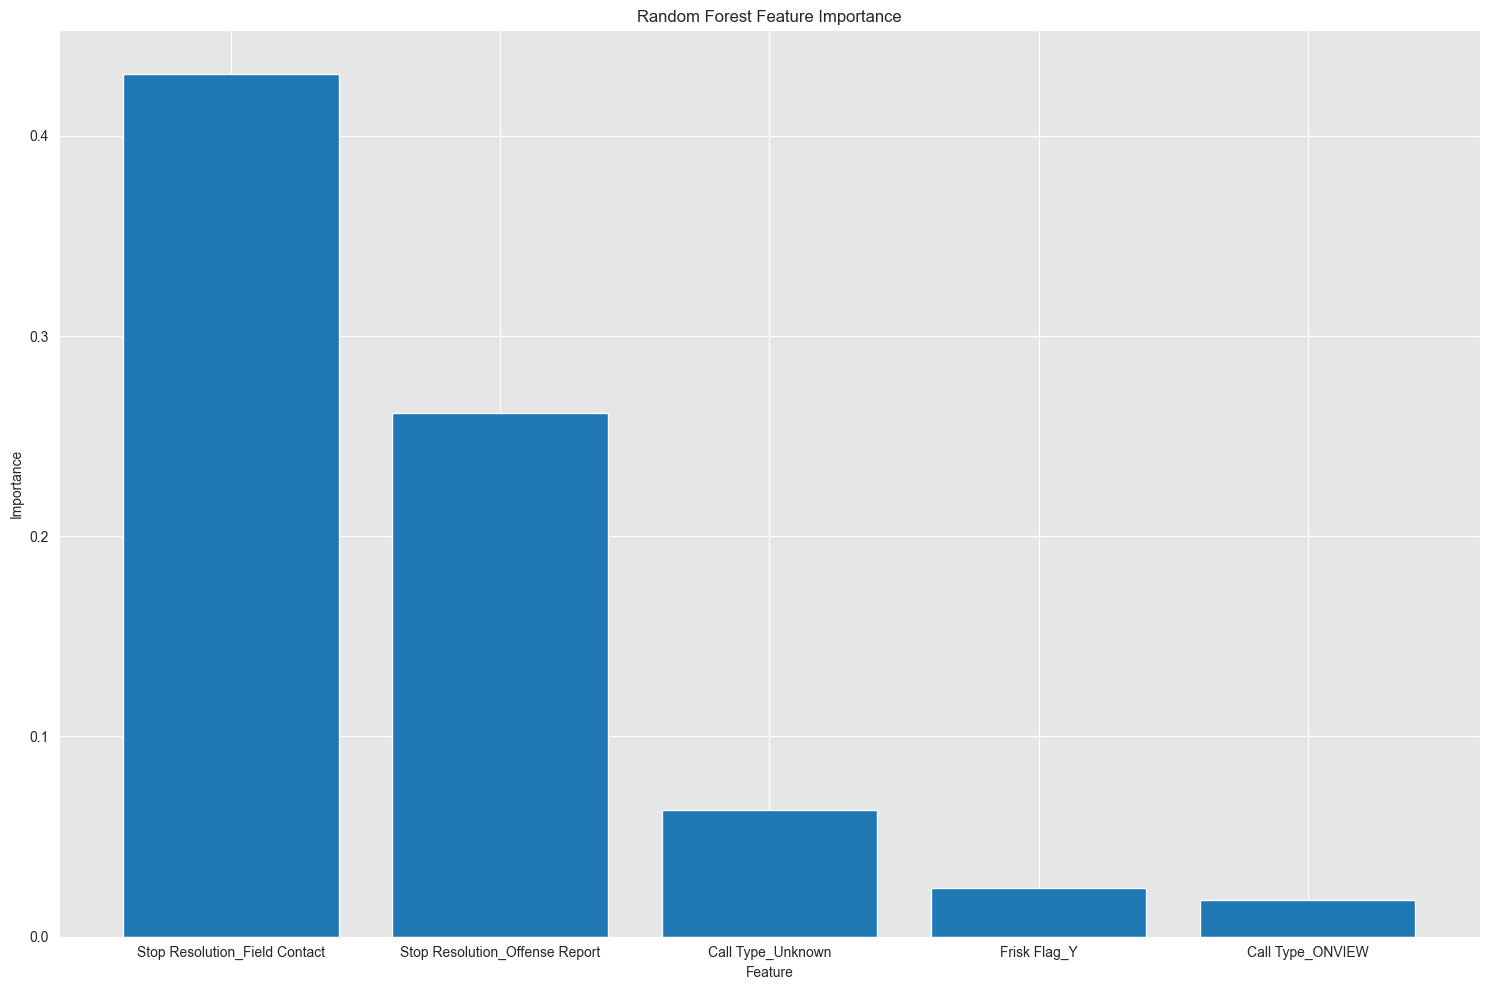

In [72]:
# Feature Importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X_train_full.columns,
    'importance': rand.feature_importances_
}).sort_values('importance', ascending=False).nlargest(5,'importance' )

plt.figure(figsize=(15, 10))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

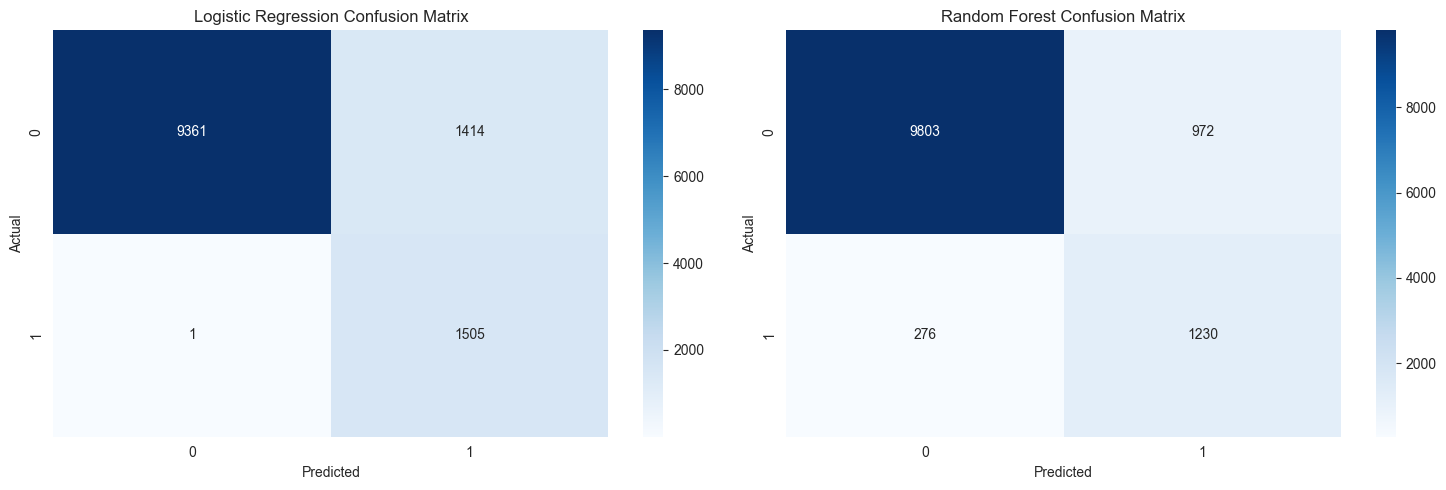

In [73]:
# 10. Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Logistic Regression Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Random Forest Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# 8. Analysis of Key Findings

In [74]:
# Weapon Type analysis
weapon_effect = df_2.groupby('Weapon Type')['Arrest Flag'].agg(['mean', 'count']).sort_values('mean', ascending=False)
print("\nWeapon Types with Highest Arrest Rates:")
print(weapon_effect.head(10))


Weapon Types with Highest Arrest Rates:
                   mean  count
Weapon Type                   
Other          0.500000     34
None           0.350000     20
Blunt Object   0.347826    253
Chemical       0.333333     63
Firearm        0.268358    749
Knife/Cutting  0.211184   2879
Unknown        0.110047  57403


In [75]:
# Frisk analysis
frisk_effect = df_2.groupby('Frisk Flag')['Arrest Flag'].agg(['mean', 'count'])
print("\nArrest Rates by Frisk Status:")
print(frisk_effect)


Arrest Rates by Frisk Status:
                mean  count
Frisk Flag                 
N           0.098081  46380
Y           0.180414  15021


In [76]:
# Demographic analysis
race_effect = df_model.groupby('Subject Perceived Race')['Arrest Flag'].agg(['mean', 'count']).sort_values('mean', ascending=False)
print("\nArrest Rates by Race:")
print(race_effect)


Arrest Rates by Race:
                                               mean  count
Subject Perceived Race                                    
Native Hawaiian or Other Pacific Islander  0.265537    177
Asian                                      0.141259   2145
Unknown                                    0.139383   4441
Black or African American                  0.136759  18529
American Indian or Alaska Native           0.115727   1685
White                                      0.113768  30448
-                                          0.068551   1415
Hispanic                                   0.000000   1634
Multi-Racial                               0.000000    781
Other                                      0.000000    146


# 9. Busines Recommendations
1. **Weapon Presence is Key**: The type of weapon involved is the strongest predictor of arrest outcomes. 
   Officers should receive continued training on proper assessment and response to different weapon types.

2. **Frisk Procedures**: The data shows that frisks are associated with different arrest rates. 
   Review frisk procedures to ensure they are conducted appropriately and consistently.

3. **Demographic Disparities**: Analyze any demographic patterns in arrest rates to ensure fair and equitable policing practices.

4. **Call Type Patterns**: Certain call types lead to higher arrest rates. Use this information for better resource allocation and officer preparedness.

5. **Precinct-level Analysis**: Investigate why arrest rates vary by precinct to identify best practices and ensure consistency across districts.

6. **Ongoing Monitoring**: Implement regular review of these patterns to identify changes over time and address any emerging issues.